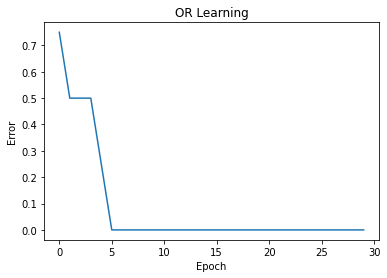

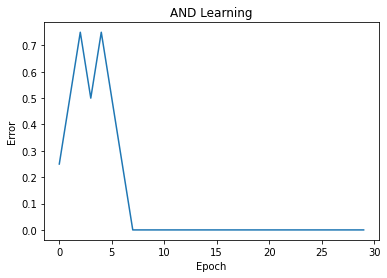

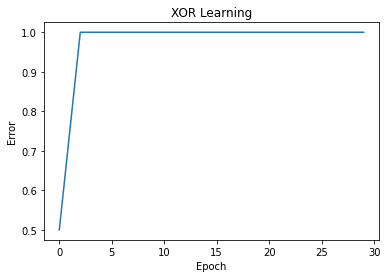

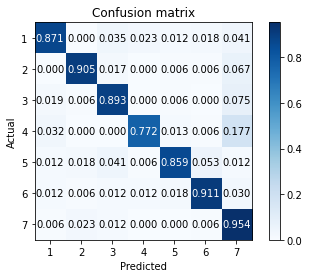

0.8820033955857386
Done


In [1]:
from NeuralNetwork import ANN, Layer
import numpy as np
from Runnables import *

"the main method will provide an output file when it is run"
"the output file will be named 41_classes.txt"
"other functionalities are commented out as running them will take a long time"

features = np.genfromtxt(".//..//data//features.txt", delimiter=",")
targets = np.genfromtxt(".//..//data//targets.txt", delimiter=",")
unknowns = np.genfromtxt(".//..//data//unknown.txt", delimiter=",")

opt = Optimization()
"Uncomment the following to get the plots after doing 10-fold cross validation for different number of hidden neurons"
"Precise in the array which are the number of hidden neurons you want to test"
#opt.render_accuracy_10fold_cross(features, targets,[8,16,24])
#opt.layout_template_one_hidden_layer_ann(features, targets,100,0.1)

eval = Evaluation()
test_fraction = 0.15
validation_fraction = 0
training_fraction = 1 - test_fraction - validation_fraction
x_train, x_val, x_test,y_train, y_val, y_test,  = eval.train_val_test_split(features, targets, test_size=test_fraction, val_size=validation_fraction)
y_train = eval.one_hot_encoder(y_train, 7)
input = Layer(10, 64, "sigmoid")
hidden = Layer(64, 64, "sigmoid")
output = Layer(64, 7, "softmax")

ann = ANN([input, hidden, output])
ann.train(x_train, y_train, 100, 0.1)
y_hat = eval.one_hot_decoder(ann.predict(x_test))

"Uncomment the following to get the confusion matrix"
eval.execute_ann_and_render_confusion_matrix(y_hat,y_test)
print(eval.get_accuracy(ann, x_test, y_test))
"This will write the predictions for the unknown.txt file to a file named 41_classes.txt"
predictions = np.ravel(eval.one_hot_decoder(ann.predict(unknowns)))

ans = ",".join(str(x) for x in predictions)
file = open("41_classes.txt", "w")
file.write(ans)
file.close()

print("Done")